In [312]:
import pathlib
import seaborn as sns
import lib.utils as utils
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.impute import KNNImputer

Daten aus Datenbank exportieren und in Dataframe speichern

In [313]:
url = 'https://glusfqycvwrucp9-db202202211424.adb.eu-zurich-1.oraclecloudapps.com/ords/sensor_datalake1/sens/insert/'

df = utils.get_all_pages(url)



Daten in Excel exportieren

In [314]:
df.to_excel('data_smartclassroom.xlsx')

In [315]:
df.head()

,entry_id,insert_time,sensor_id,value1,unit1
0,2291,2022-03-30T14:49:51.283Z,CIRCUITPY323d,785.0,PPM
1,2304,2022-03-30T14:56:37.668Z,CIRCUITPY323d,27.4,C
2,2307,2022-03-30T14:57:37.983Z,CIRCUITPY323d,27.4,C
3,2311,2022-03-30T14:58:40.293Z,CIRCUITPY323d,31.1,%
4,2328,2022-03-30T15:04:41.298Z,CIRCUITPY323d,27.7,C


In [316]:
#convert inser_time to timedate
df['insert_time'] = pd.to_datetime(df['insert_time'])
#and add 2 hours to insert time
df['insert_time'] = df['insert_time'] + pd.Timedelta(hours=2)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130952 entries, 0 to 130951
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   entry_id     130952 non-null  int64              
 1   insert_time  130952 non-null  datetime64[ns, UTC]
 2   sensor_id    130952 non-null  object             
 3   value1       130952 non-null  float64            
 4   unit1        130952 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 5.0+ MB


Daten für Analyse restrukturieren

In [317]:
#pivot
df_pivot = df.pivot_table(index='insert_time',columns=['sensor_id','unit1'],values='value1')
#multindex to single index
df_pivot.columns =	df_pivot.columns.map('_'.join)
#resample on 5min time windows


#calculate slope for each tiem window



df_pivot = df_pivot.resample('1Min').agg({
                                            'CIRCUITPY323d_PPM':'mean', 
                                            'CIRCUITPY323d_C':'mean',
                                            'CIRCUITPY323d_%':'mean',
                                            'CIRCUITPY825a_Window':'last',
                                            'CIRCUITPYbec9_Person':'last'
                                            })
df_pivot.head(30)

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person
insert_time,,,,,
2022-03-24 16:02:00+00:00,1068.800000,26.600000,34.600000,0.0,NaN
2022-03-24 16:03:00+00:00,1073.700000,26.500000,32.500000,NaN,NaN
2022-03-24 16:04:00+00:00,1061.600000,26.400000,33.450000,NaN,NaN
2022-03-24 16:05:00+00:00,1072.400000,26.400000,33.950000,NaN,NaN
2022-03-24 16:06:00+00:00,1115.650000,26.400000,34.150000,NaN,NaN
2022-03-24 16:07:00+00:00,1145.600000,26.400000,34.700000,NaN,NaN
2022-03-24 16:08:00+00:00,1142.450000,26.400000,35.000000,NaN,NaN
2022-03-24 16:09:00+00:00,1152.500000,26.400000,35.550000,NaN,NaN
2022-03-24 16:10:00+00:00,1200.900000,26.400000,35.850000,NaN,NaN


In [318]:
#neue Variable die die Luftqualität Quantitativ einordnet
df_pivot['air_quality'] =np.where(df_pivot['CIRCUITPY323d_PPM']>600, 'good',
                   np.where(df_pivot['CIRCUITPY323d_PPM']>1000, 'ok',
                   np.where(df_pivot['CIRCUITPY323d_PPM']>1400, 'bad', 'top')))


In [319]:
#select specific time window
df_timewindow = df_pivot.loc['2022-04-14 00:00:00':'2022-04-30 23:50:00']

Leere Zeilen augrund der Restruktuierung befüllen

In [320]:
#Fill Nan for window sensor
df_timewindow['CIRCUITPY825a_Window'].fillna(method='ffill',inplace=True)
df_timewindow['CIRCUITPY825a_Window'].fillna(method='bfill',inplace=True)
#Fill Nan for people sensor
df_timewindow['CIRCUITPYbec9_Person'].fillna(method='ffill',inplace=True)
#Fill Nan for first entry for people sensor
df_timewindow['CIRCUITPYbec9_Person'].fillna(method='bfill',inplace=True)

df_timewindow.head(5)

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person,air_quality
insert_time,,,,,,
2022-04-14 00:00:00+00:00,691.4,25.7,45.0,1.0,1.0,good
2022-04-14 00:01:00+00:00,694.7,25.7,44.9,1.0,1.0,good
2022-04-14 00:02:00+00:00,697.3,25.7,45.0,1.0,1.0,good
2022-04-14 00:03:00+00:00,696.5,25.7,44.9,1.0,1.0,good
2022-04-14 00:04:00+00:00,694.3,25.7,45.0,1.0,1.0,good


NA's betrachten und imputieren

In [321]:
df_timewindow.isna().sum()

CIRCUITPY323d_PPM       5454
CIRCUITPY323d_C         5454
CIRCUITPY323d_%         5449
CIRCUITPY825a_Window       0
CIRCUITPYbec9_Person       0
air_quality                0
dtype: int64

In [322]:
df_timewindow_clean = df_timewindow

In [323]:
df_timewindow_clean

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person,air_quality
insert_time,,,,,,
2022-04-14 00:00:00+00:00,691.4,25.7,45.0,1.0,1.0,good
2022-04-14 00:01:00+00:00,694.7,25.7,44.9,1.0,1.0,good
2022-04-14 00:02:00+00:00,697.3,25.7,45.0,1.0,1.0,good
2022-04-14 00:03:00+00:00,696.5,25.7,44.9,1.0,1.0,good
2022-04-14 00:04:00+00:00,694.3,25.7,45.0,1.0,1.0,good
...,...,...,...,...,...,...
2022-04-30 23:46:00+00:00,673.2,25.9,44.5,0.0,0.0,good
2022-04-30 23:47:00+00:00,672.9,25.9,44.5,0.0,0.0,good
2022-04-30 23:48:00+00:00,672.6,25.9,44.5,0.0,0.0,good


In [324]:
imputer = KNNImputer(n_neighbors=5, weights='distance', missing_values=np.nan, copy=True)
df_timewindow_clean.CIRCUITPY323d_PPM = imputer.fit_transform(df_timewindow_clean.CIRCUITPY323d_PPM.values.reshape(-1,1))
df_timewindow_clean.CIRCUITPY323d_C = imputer.fit_transform(df_timewindow_clean.CIRCUITPY323d_C.values.reshape(-1,1))
df_timewindow_clean["CIRCUITPY323d_%"] = imputer.fit_transform(df_timewindow_clean["CIRCUITPY323d_%"].values.reshape(-1,1))

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3094/1808473478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [325]:
df_timewindow_clean.isna().sum()

CIRCUITPY323d_PPM       0
CIRCUITPY323d_C         0
CIRCUITPY323d_%         0
CIRCUITPY825a_Window    0
CIRCUITPYbec9_Person    0
air_quality             0
dtype: int64

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


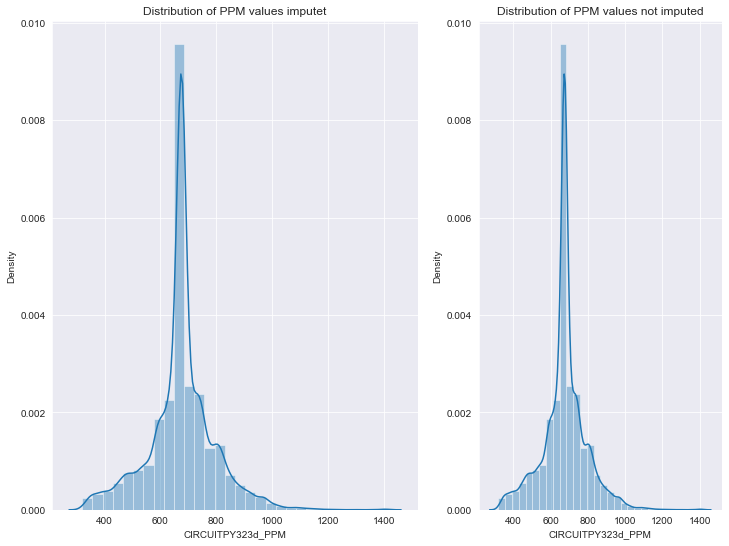

In [326]:
#Distribution of PPM values
f, axs = plt.subplots(1,2, figsize=(12,9), gridspec_kw=dict(width_ratios=[15,10]))
sns.distplot(df_timewindow_clean.CIRCUITPY323d_PPM, ax=axs[0], bins=30).set_title('Distribution of PPM values imputet')
sns.distplot(df_timewindow.CIRCUITPY323d_PPM, ax=axs[1], bins=30).set_title('Distribution of PPM values not imputed')
plt.show()

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


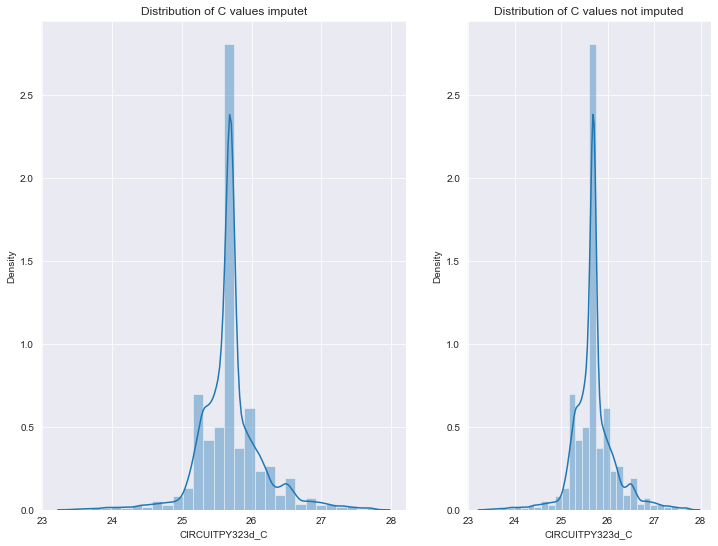

In [327]:
#Distribution of C values
f, axs = plt.subplots(1,2, figsize=(12,9), gridspec_kw=dict(width_ratios=[15,10]))
sns.distplot(df_timewindow_clean.CIRCUITPY323d_C, ax=axs[0], bins=30).set_title('Distribution of C values imputet')
sns.distplot(df_timewindow.CIRCUITPY323d_C, ax=axs[1], bins=30).set_title('Distribution of C values not imputed')
plt.show()


/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


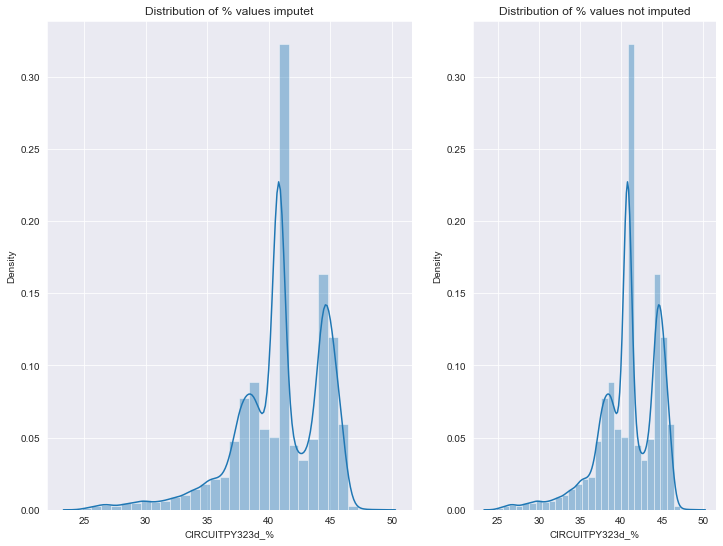

In [328]:
#Distribution of % values
f, axs = plt.subplots(1,2, figsize=(12,9), gridspec_kw=dict(width_ratios=[15,10]))
sns.distplot(df_timewindow_clean["CIRCUITPY323d_%"], ax=axs[0], bins=30).set_title('Distribution of % values imputet')
sns.distplot(df_timewindow["CIRCUITPY323d_%"], ax=axs[1], bins=30).set_title('Distribution of % values not imputed')
plt.show()


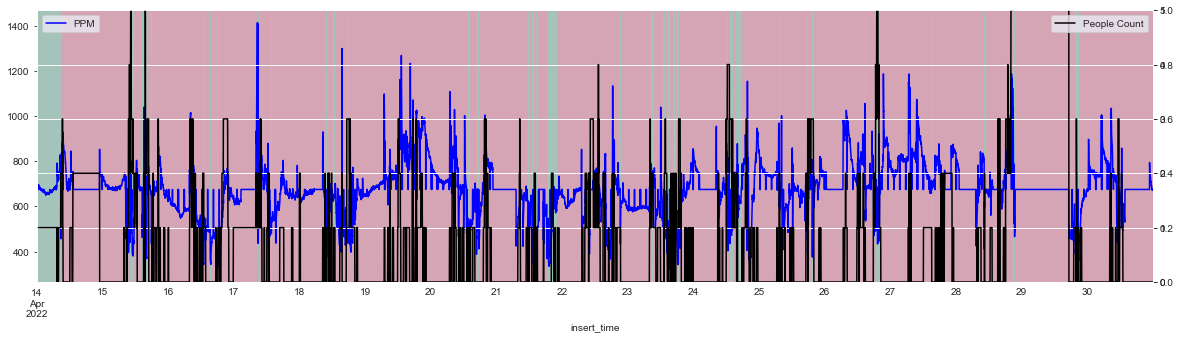

In [329]:
#linechart cobined with bar chart
#if windows sensor 1 blue line if windows sensor 0 red line
# Use a boundary norm instead
fig, ax1 = plt.subplots()
#hide grid
ax1 = df_timewindow_clean['CIRCUITPY323d_PPM'].plot(kind='line',color='blue',label='PPM', grid=False)
ax3 = ax1.twinx()
#ax3 = df_timewindow_clean['CIRCUITPY323d_C'].plot(kind='line',color='red',label='C', grid=False,ylim=(0,30))
#ax4 = ax1.twinx()
#ax4 = df_timewindow_clean['CIRCUITPY323d_%'].plot(kind='line',color='green',label='%', grid=False,ylim=(20,60))
ax2 = ax1.twinx()
ax2 = df_timewindow_clean['CIRCUITPYbec9_Person'].plot(kind='line',color='black',label='People Count',ylim=(0,5))
ax1.pcolorfast(ax1.get_xlim(), ax1.get_ylim(),df_timewindow_clean['CIRCUITPY825a_Window'].values[np.newaxis],cmap='RdYlGn', alpha=0.3,label='Windows')
#set size
ax1.figure.set_size_inches(20, 5)
#show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
#ax3.legend(loc='center right')
#ax4.legend(loc='lower right')
#additonal legend for window sensor


plt.show()

In [330]:
#calculate correleation between two columns
df_timewindow_clean.corr(method="spearman")

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person
CIRCUITPY323d_PPM,1.000000,0.260472,0.507613,-0.230011,0.029109
CIRCUITPY323d_C,0.260472,1.000000,0.150948,-0.146281,0.140632
CIRCUITPY323d_%,0.507613,0.150948,1.000000,-0.108294,-0.049191
CIRCUITPY825a_Window,-0.230011,-0.146281,-0.108294,1.000000,0.159847
CIRCUITPYbec9_Person,0.029109,0.140632,-0.049191,0.159847,1.000000


In [331]:
#calculate correleation between two columns
df_timewindow_clean.corr(method="pearson")

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person
CIRCUITPY323d_PPM,1.000000,0.348664,0.520491,-0.276139,0.024977
CIRCUITPY323d_C,0.348664,1.000000,0.272228,-0.192669,0.109316
CIRCUITPY323d_%,0.520491,0.272228,1.000000,-0.151171,-0.034624
CIRCUITPY825a_Window,-0.276139,-0.192669,-0.151171,1.000000,0.072078
CIRCUITPYbec9_Person,0.024977,0.109316,-0.034624,0.072078,1.000000


Janis Ideen data wrangling

In [332]:
df_timewindow_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24471 entries, 2022-04-14 00:00:00+00:00 to 2022-04-30 23:50:00+00:00
Freq: T
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CIRCUITPY323d_PPM     24471 non-null  float64
 1   CIRCUITPY323d_C       24471 non-null  float64
 2   CIRCUITPY323d_%       24471 non-null  float64
 3   CIRCUITPY825a_Window  24471 non-null  float64
 4   CIRCUITPYbec9_Person  24471 non-null  float64
 5   air_quality           24471 non-null  object 
dtypes: float64(5), object(1)
memory usage: 1.3+ MB


/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


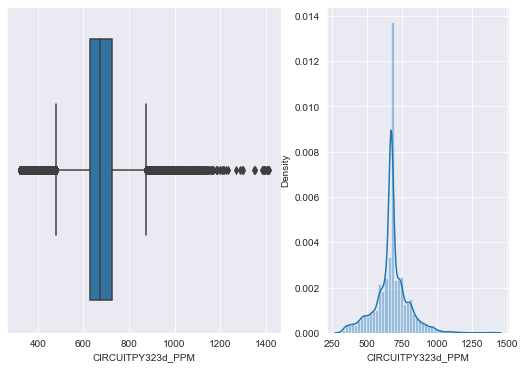

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


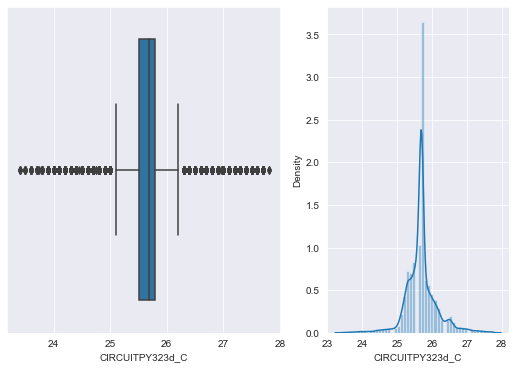

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


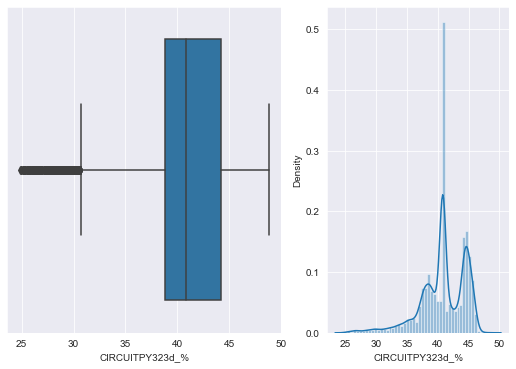

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


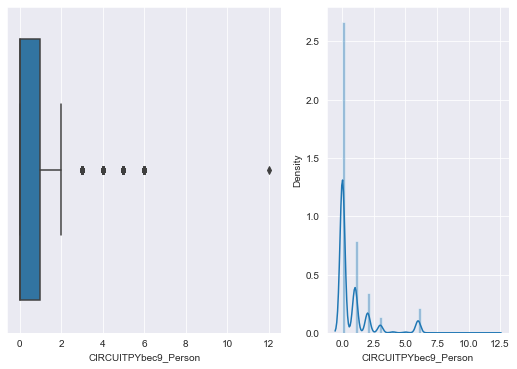

In [333]:
#detect outliers in PPM data
#print boxlot
utils.overview(df_timewindow_clean, "CIRCUITPY323d_PPM")
utils.overview(df_timewindow_clean, "CIRCUITPY323d_C")
utils.overview(df_timewindow_clean, "CIRCUITPY323d_%")
utils.overview(df_timewindow_clean, "CIRCUITPYbec9_Person")

In [334]:
print(df_timewindow_clean['CIRCUITPY323d_PPM'].max())
print(df_timewindow_clean['CIRCUITPY323d_PPM'].min())

1413.1999999999998
320.0


<AxesSubplot:title={'center':'CIRCUITPY323d_PPM'}, xlabel='CIRCUITPYbec9_Person'>

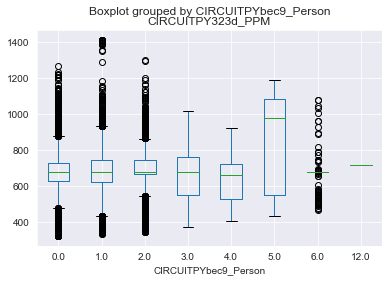

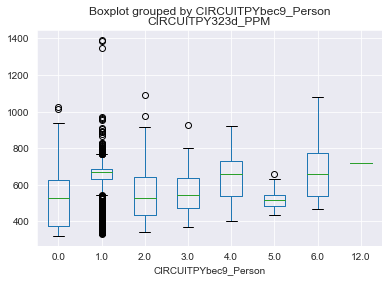

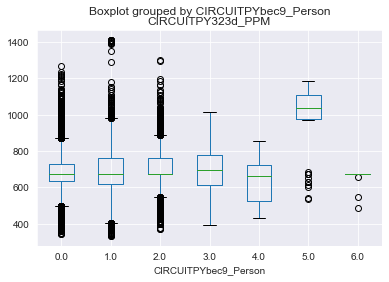

In [335]:
#group per persons and give the average value
df_timewindow_clean.groupby('CIRCUITPYbec9_Person').mean()

#plot boxplot per group for PPM
df_timewindow_clean.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')

#splitt dataframe where window sensor is 1 and 0
df_timewindow_clean_1 = df_timewindow_clean[df_timewindow_clean['CIRCUITPY825a_Window']==1]
df_timewindow_clean_0 = df_timewindow_clean[df_timewindow_clean['CIRCUITPY825a_Window']==0]

#splitt dataframe where window sensor is 0 and person is greater than 0
df_timewindow_clean_0_person = df_timewindow_clean_0[df_timewindow_clean_0['CIRCUITPYbec9_Person']>0]

df_timewindow_clean_1.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')
df_timewindow_clean_0.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')







<AxesSubplot:title={'center':'CIRCUITPY323d_PPM'}, xlabel='CIRCUITPYbec9_Person'>

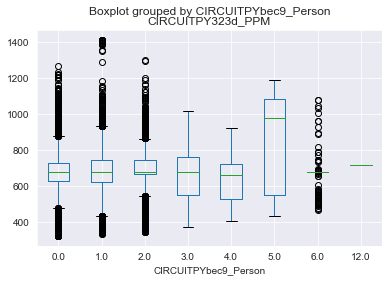

In [336]:
df_timewindow_clean.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window
CIRCUITPYbec9_Person,,,,
0.0,674.78748,25.693911,40.814218,0.0
1.0,674.78748,25.700000,40.814218,0.0
2.0,674.78748,25.693911,40.814218,0.0
3.0,698.30000,25.900000,40.814218,0.0
4.0,661.90000,25.900000,42.500000,0.0
5.0,1035.10000,27.400000,45.400000,0.0
6.0,674.78748,25.693911,40.814218,0.0


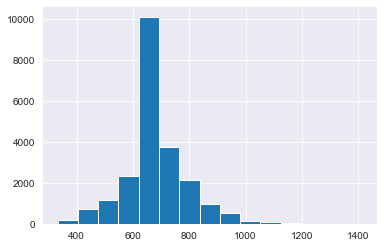

In [337]:
# group PPM in 100 bins
df_timewindow_clean_0['CIRCUITPY323d_PPM'].hist(bins=15)

#what is the median person in those bins
df_timewindow_clean_0.groupby('CIRCUITPYbec9_Person').median()


# Wie stark sinkt der CO2 gehalt, wenn gelüftet wird?
# Wie schnell steigt der CO2 gehalt zwischen den einzelnen Lüftugsintervallen?

Datenaufbereitung

In [338]:
#new dataframes window open and closed
df_window_open = df_timewindow_clean[df_timewindow_clean["CIRCUITPY825a_Window"]==1]
df_window_closed = df_timewindow_clean[df_timewindow_clean["CIRCUITPY825a_Window"]==0]
df_window_open

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person,air_quality
insert_time,,,,,,
2022-04-14 00:00:00+00:00,691.40000,25.7,45.0,1.0,1.0,good
2022-04-14 00:01:00+00:00,694.70000,25.7,44.9,1.0,1.0,good
2022-04-14 00:02:00+00:00,697.30000,25.7,45.0,1.0,1.0,good
2022-04-14 00:03:00+00:00,696.50000,25.7,44.9,1.0,1.0,good
2022-04-14 00:04:00+00:00,694.30000,25.7,45.0,1.0,1.0,good
...,...,...,...,...,...,...
2022-04-29 20:49:00+00:00,364.40000,23.6,34.5,1.0,0.0,top
2022-04-30 08:10:00+00:00,711.20000,25.7,43.8,1.0,1.0,good
2022-04-30 08:11:00+00:00,684.00000,25.7,43.3,1.0,1.0,good


In [339]:
#Mean time window open
index_closed = [0]
t_diff_closed = []
for i in range(len(df_timewindow_clean)):
    if (df_timewindow_clean.iloc[i]['CIRCUITPY825a_Window'] == 1.0) and (index_closed[-1] < i):
        index_closed.append(i)
        t_diff_closed.append(df_timewindow_clean.index[index_closed[-1]] - df_timewindow_clean.index[index_closed[-2]])
        next_zero_closed = index_closed[-1]
        while df_timewindow_clean.iloc[next_zero_closed]['CIRCUITPY825a_Window'] != 0:
            next_zero_closed += 1
        index_closed.append(next_zero_closed)

In [340]:
index_open = []
t_diff_open = []
next_step = 0
while df_timewindow_clean.iloc[next_step]['CIRCUITPY825a_Window'] != 1:
    next_step += 1
index_open.append(next_step)

for i in range(next_step, len(df_timewindow_clean)):
    if (df_timewindow_clean.iloc[i]['CIRCUITPY825a_Window'] == 0.0) and (index_open[-1] < i):
        index_open.append(i)
        t_diff_open.append(df_timewindow_clean.index[index_open[-1]] - df_timewindow_clean.index[index_open[-2]])
        next_zero_open = index_open[-1]
        while (next_zero_open < (len(df_timewindow_clean)-2)):
            if df_timewindow_clean.iloc[next_zero_open]['CIRCUITPY825a_Window'] == 1.0:
                break
            else:
                next_zero_open += 1
        index_open.append(next_zero_open)

In [341]:
df_mean_ppm_window = pd.DataFrame({"mean_ppm_window_open":[df_timewindow_clean.iloc[index_open[0]:index_open[1]]['CIRCUITPY323d_PPM'].mean()],"mean_ppm_window_closed":[df_timewindow_clean.iloc[index_closed[0]:index_closed[1]]['CIRCUITPY323d_PPM'].mean()]})

In [342]:
#Create new dataframe with time window open and change in ppm
df_timewindow_clean_open = pd.DataFrame({"time_diff": t_diff_open, "ppm_diff":0, "ppm_per_min":0, "people_counter":0})

In [368]:
count = 0
for i in range(0,(len(index_open)-1),2):
    df_timewindow_clean_open["ppm_diff"][count] = df_timewindow_clean["CIRCUITPY323d_PPM"][index_open[i+1]] - df_timewindow_clean["CIRCUITPY323d_PPM"][index_open[i]]
    people_counter = 0
    for n in range(index_open[i],index_open[i+1]):
        people_counter += df_timewindow_clean["CIRCUITPYbec9_Person"][n]
    if (people_counter > 0) and (df_timewindow_clean_open['time_diff'][count] / np.timedelta64(1, 'm') > 0):
        df_timewindow_clean_open["people_counter"][count] = people_counter/(df_timewindow_clean_open["time_diff"][count] / np.timedelta64(1, 'm'))
    count += 1

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3094/977069820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_open["ppm_diff"][count] = df_timewindow_clean["CIRCUITPY323d_PPM"][index_open[i+1]] - df_timewindow_clean["CIRCUITPY323d_PPM"][index_open[i]]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3094/977069820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_open["people_counter"][count] = people_counter/(df_timewindow_clean_open["time_diff"][count] / np.timedelta64(1, 'm'))


In [369]:
#fill ppm_per_min with ppm_diff/time_diff
for i in range(len(df_timewindow_clean_open)):
    df_timewindow_clean_open["ppm_per_min"][i] = df_timewindow_clean_open["ppm_diff"][i]/(df_timewindow_clean_open["time_diff"][i].seconds/60)

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3094/3120939671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_open["ppm_per_min"][i] = df_timewindow_clean_open["ppm_diff"][i]/(df_timewindow_clean_open["time_diff"][i].seconds/60)


In [370]:
df_timewindow_clean_open.isna().sum()

time_diff         0
ppm_diff          0
ppm_per_min       0
people_counter    0
dtype: int64

In [371]:
df_timewindow_clean_open.dropna(inplace=True)

In [372]:
df_timewindow_clean_open

,time_diff,ppm_diff,ppm_per_min,people_counter
0,0 days 08:49:00,-235,0,0
1,0 days 00:02:00,-137,-68,0
2,0 days 00:01:00,5,5,0
3,0 days 00:02:00,-13,-6,2
4,0 days 00:15:00,-136,-9,3
...,...,...,...,...
158,0 days 01:35:00,-233,-2,0
159,0 days 00:02:00,-153,-76,1
160,0 days 00:01:00,-177,-177,0
161,0 days 00:01:00,12,12,0


In [373]:
df_timewindow_clean_open = df_timewindow_clean_open[df_timewindow_clean_open["time_diff"] > pd.Timedelta(minutes=1)]

In [374]:
#Create new dataframe with time window closed and change in ppm
df_timewindow_clean_closed = pd.DataFrame({"time_diff": t_diff_closed, "ppm_diff":0, "ppm_per_min":0, "people_counter":0})

In [375]:
df_timewindow_clean.index[index_closed[1]]-df_timewindow_clean.index[index_closed[0]]

Timedelta('0 days 00:01:00')

In [376]:
df_timewindow_clean.CIRCUITPYbec9_Person[index_closed[1]]-df_timewindow_clean.CIRCUITPYbec9_Person[index_closed[0]]

0.0

In [377]:
person_counter = 0
for i in range(index_closed[0], index_closed[1]):
    person_counter += df_timewindow_clean["CIRCUITPYbec9_Person"][i]
print(person_counter)

1.0


In [378]:
df_timewindow_clean

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person,air_quality
insert_time,,,,,,
2022-04-14 00:00:00+00:00,691.4,25.7,45.0,1.0,1.0,good
2022-04-14 00:01:00+00:00,694.7,25.7,44.9,1.0,1.0,good
2022-04-14 00:02:00+00:00,697.3,25.7,45.0,1.0,1.0,good
2022-04-14 00:03:00+00:00,696.5,25.7,44.9,1.0,1.0,good
2022-04-14 00:04:00+00:00,694.3,25.7,45.0,1.0,1.0,good
...,...,...,...,...,...,...
2022-04-30 23:46:00+00:00,673.2,25.9,44.5,0.0,0.0,good
2022-04-30 23:47:00+00:00,672.9,25.9,44.5,0.0,0.0,good
2022-04-30 23:48:00+00:00,672.6,25.9,44.5,0.0,0.0,good


In [379]:
count = 0
for i in range(0,(len(index_closed)-1),2):
    df_timewindow_clean_closed["ppm_diff"][count] = df_timewindow_clean["CIRCUITPY323d_PPM"][index_closed[i+1]] - df_timewindow_clean["CIRCUITPY323d_PPM"][index_closed[i]]
    people_counter = 0
    for n in range(index_closed[i],index_closed[i+1]):
        people_counter += df_timewindow_clean["CIRCUITPYbec9_Person"][n]
    if (people_counter > 0) and (df_timewindow_clean_closed['time_diff'][count] / np.timedelta64(1, 'm') > 0):
        df_timewindow_clean_closed["people_counter"][count] = people_counter/(df_timewindow_clean_closed["time_diff"][count] / np.timedelta64(1, 'm'))
    count += 1

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3094/1778191021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_closed["ppm_diff"][count] = df_timewindow_clean["CIRCUITPY323d_PPM"][index_closed[i+1]] - df_timewindow_clean["CIRCUITPY323d_PPM"][index_closed[i]]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3094/1778191021.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_closed["people_counter"][count] = people_counter/(df_timewindow_clean_closed["time_diff"][count] / np.timedelta64(1, 'm'))


In [380]:
df_timewindow_clean_closed

,time_diff,ppm_diff,ppm_per_min,people_counter
0,0 days 00:01:00,3,0,1
1,0 days 23:41:00,277,0,0
2,0 days 00:21:00,49,0,0
3,0 days 00:35:00,-213,0,0
4,0 days 00:37:00,248,0,3
...,...,...,...,...
157,0 days 19:40:00,-47,0,6
158,0 days 02:04:00,80,0,0
159,0 days 11:20:00,348,0,0
160,0 days 03:28:00,117,0,0


In [381]:
#fill ppm_per_min with ppm_diff/time_diff
for i in range(len(df_timewindow_clean_closed)):
    df_timewindow_clean_closed["ppm_per_min"][i] = df_timewindow_clean_closed["ppm_diff"][i]/(df_timewindow_clean_closed["time_diff"][i].seconds/60)

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3094/2512564026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_closed["ppm_per_min"][i] = df_timewindow_clean_closed["ppm_diff"][i]/(df_timewindow_clean_closed["time_diff"][i].seconds/60)


In [382]:
df_timewindow_clean_closed

,time_diff,ppm_diff,ppm_per_min,people_counter
0,0 days 00:01:00,3,3,1
1,0 days 23:41:00,277,0,0
2,0 days 00:21:00,49,2,0
3,0 days 00:35:00,-213,-6,0
4,0 days 00:37:00,248,6,3
...,...,...,...,...
157,0 days 19:40:00,-47,0,6
158,0 days 02:04:00,80,0,0
159,0 days 11:20:00,348,0,0
160,0 days 03:28:00,117,0,0


In [383]:
df_timewindow_clean_closed.dropna(inplace=True)

In [384]:
df_timewindow_clean_closed

,time_diff,ppm_diff,ppm_per_min,people_counter
0,0 days 00:01:00,3,3,1
1,0 days 23:41:00,277,0,0
2,0 days 00:21:00,49,2,0
3,0 days 00:35:00,-213,-6,0
4,0 days 00:37:00,248,6,3
...,...,...,...,...
157,0 days 19:40:00,-47,0,6
158,0 days 02:04:00,80,0,0
159,0 days 11:20:00,348,0,0
160,0 days 03:28:00,117,0,0


In [385]:
df_timewindow_clean_closed = df_timewindow_clean_closed[df_timewindow_clean_closed["time_diff"] > pd.Timedelta(minutes=1)]
df_timewindow_clean_closed = df_timewindow_clean_closed[df_timewindow_clean_closed["ppm_diff"] > 0 ]

In [386]:
df_change_ppm = pd.DataFrame({"ppm_per_min_open":[df_timewindow_clean_open["ppm_per_min"].mean()],"ppm_per_min_closed":[df_timewindow_clean_closed["ppm_per_min"].mean()]})

In [387]:
df_mean_window_open_closed = pd.DataFrame({"mean_ppm_window_open":[df_timewindow_clean_open["time_diff"].mean()],"mean_ppm_window_closed":[df_timewindow_clean_closed['time_diff'].mean()]})
df_mean_window_open_closed

,mean_ppm_window_open,mean_ppm_window_closed
0,0 days 00:26:57.804878048,0 days 02:28:45.818181818


In [388]:
df_lueften_daten = pd.DataFrame(columns = ["ppm_wert", "zeit_diff"])
df_lueften_daten

,ppm_wert,zeit_diff


In [389]:
summe_ppm = 600
time_delta = 0
index = 0
while summe_ppm < 1000:
    df_lueften_daten = df_lueften_daten.append({"ppm_wert": summe_ppm}, ignore_index=True)
    df_lueften_daten["zeit_diff"][index] = time_delta
    time_delta += 1
    summe_ppm += df_timewindow_clean_closed["ppm_per_min"].mean()
    index += 1
while summe_ppm > 600:
    df_lueften_daten = df_lueften_daten.append({"ppm_wert": summe_ppm}, ignore_index=True)
    df_lueften_daten["zeit_diff"][index] = time_delta
    time_delta += 1
    summe_ppm += df_timewindow_clean_open["ppm_per_min"].mean()
    index += 1

Visualisierungen

<Figure size 1440x360 with 0 Axes>

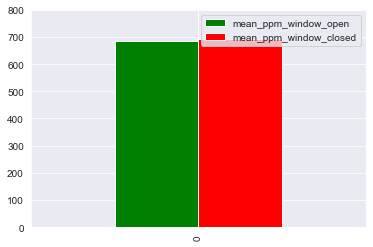

In [390]:
#barplot of mean ppm values
plt.figure(figsize=(20,5))
df_mean_ppm_window.plot(kind='bar',color=['green','red'],grid=True,ylim=(0,800))
plt.show()

<AxesSubplot:xlabel='people_counter', ylabel='ppm_diff'>

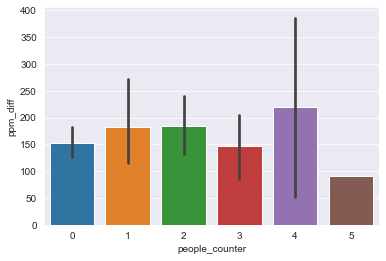

In [391]:
sns.barplot(x=df_timewindow_clean_closed["people_counter"], y=df_timewindow_clean_closed["ppm_diff"])

<AxesSubplot:xlabel='zeit_diff', ylabel='ppm_wert'>

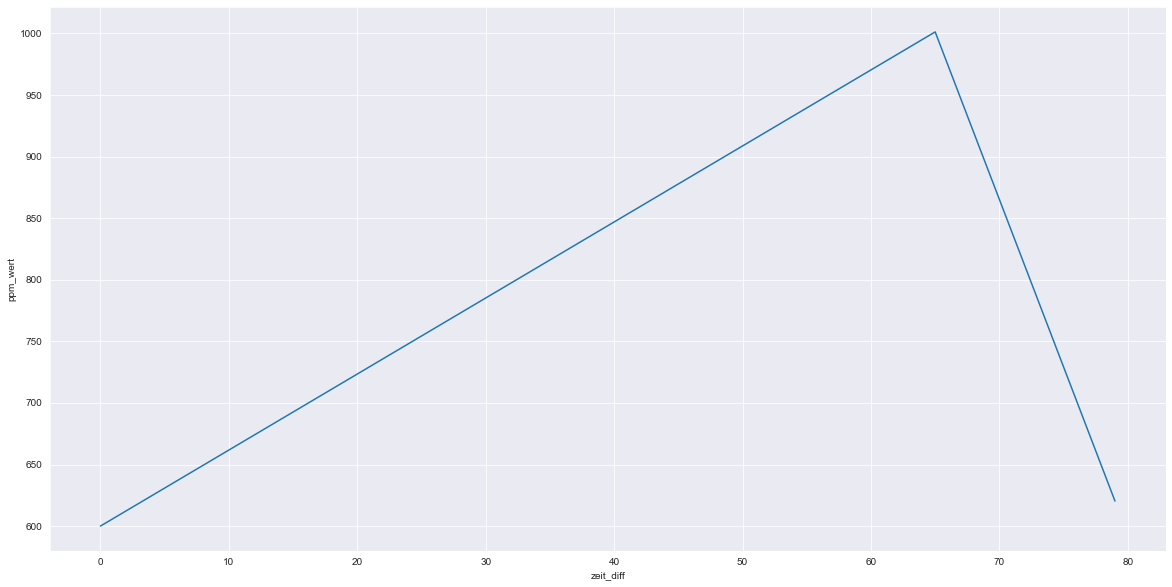

In [392]:
#plot ppm_wert vs zeit_diff
plt.figure(figsize=(20,10))
sns.lineplot(x="zeit_diff", y="ppm_wert", data=df_lueften_daten)

<Figure size 1440x360 with 0 Axes>

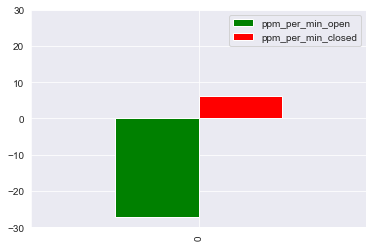

In [393]:
df_change_ppm
plt.figure(figsize=(20, 5))
df_change_ppm.plot(kind='bar', color=['green', 'red'], grid=True, ylim=(-30, 30))
plt.show()

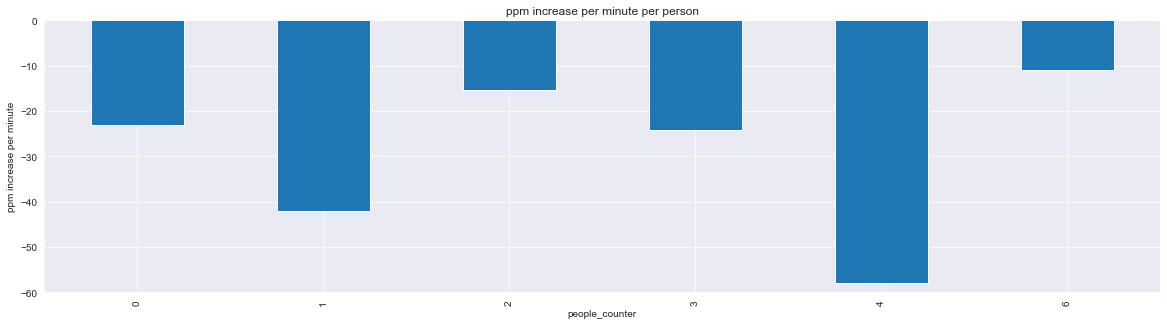

In [394]:
plt.figure(figsize=(20,5))
df_timewindow_clean_open.groupby("people_counter").mean()["ppm_per_min"].plot(kind='bar',grid=True,ylim=(-60,0))
plt.ylabel("ppm increase per minute")
plt.title("ppm increase per minute per person")
plt.show()

In [395]:
df_timewindow_clean_closed.groupby("people_counter").mean()["ppm_per_min"]

people_counter
0     2.939394
1     5.791667
2    12.375000
3    18.333333
4    18.500000
5    45.000000
Name: ppm_per_min, dtype: float64

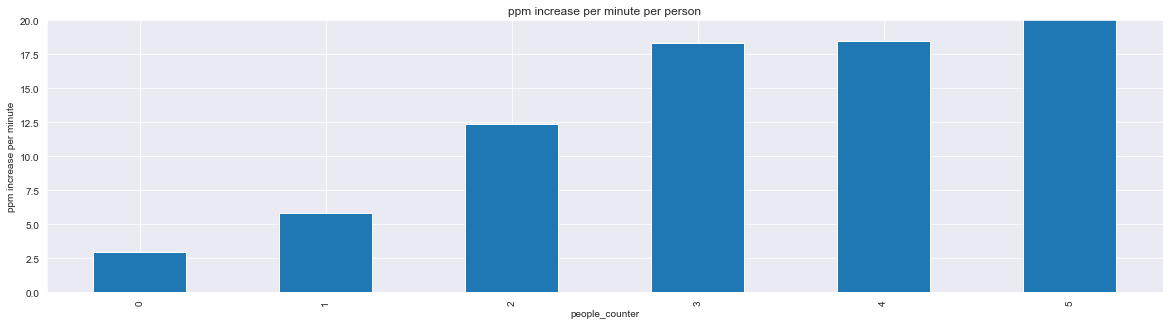

In [396]:
plt.figure(figsize=(20,5))
df_timewindow_clean_closed.groupby("people_counter").mean()["ppm_per_min"].plot(kind='bar',grid=True,ylim=(0,20))
plt.ylabel("ppm increase per minute")
plt.title("ppm increase per minute per person")
plt.show()

TypeError: value should be a 'Timedelta', 'NaT', or array of those. Got 'int' instead.

<Figure size 1440x360 with 0 Axes>

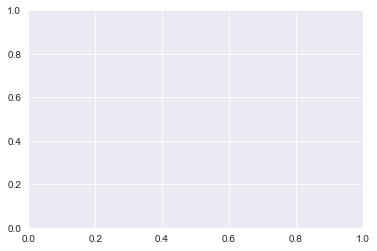

In [265]:
plt.figure(figsize=(20,5))
df_mean_window_open_closed.plot(kind='bar',color=['green','red'],grid=True,ylim=(0,110))
plt.show()